In [2]:
# Data vizualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# To test the performance of the models used
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

Load the training data with the file train.csv

In [3]:
data_app_train = pd.read_csv("./train.csv")
data_app_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


We check if the classes are well distributed to avoid problems related to the non homogeneity of the classes

In [4]:
data_app_train["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [5]:
data_app_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data_app_train.groupby("price_range").mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


Text(0.5, 1.0, 'Phone width')

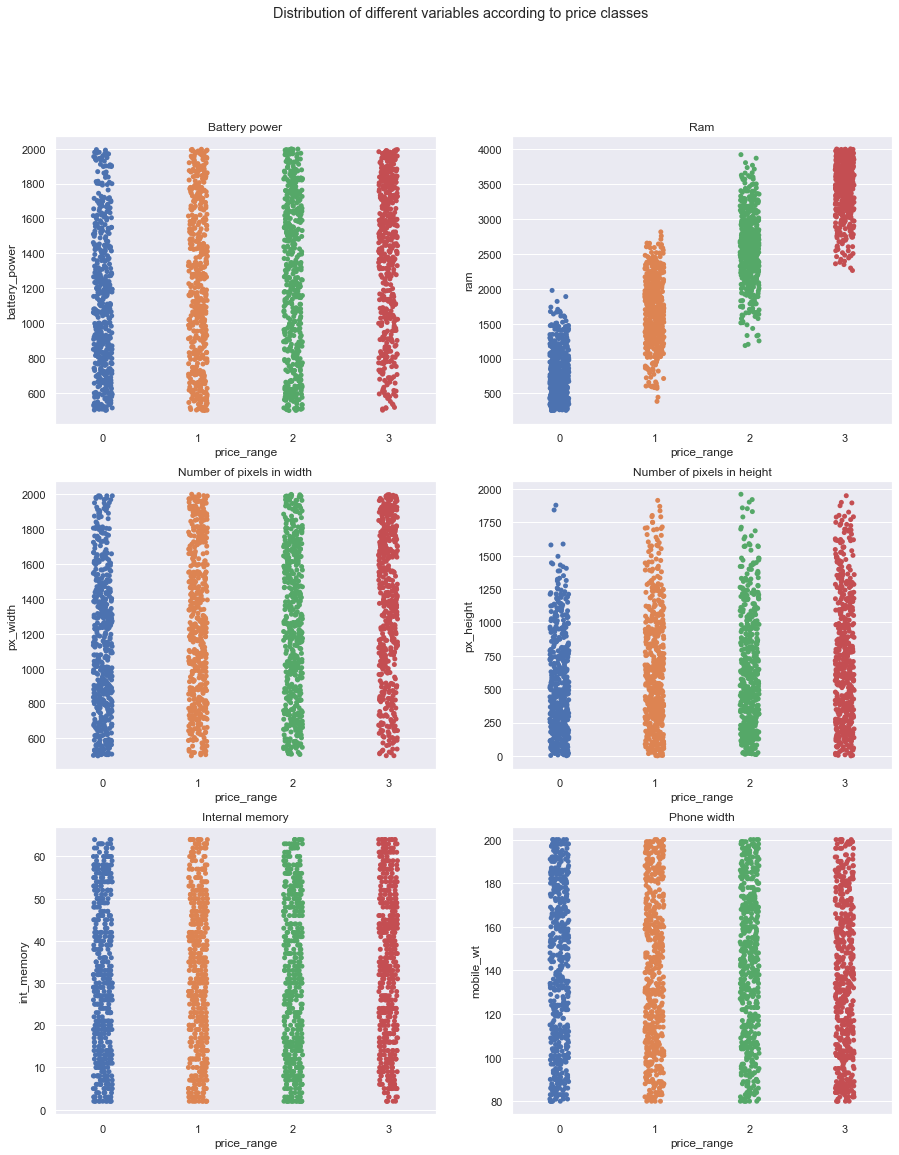

In [8]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 18),)
fig.suptitle('Distribution of different variables according to price classes')

sns.stripplot(ax=axes[0, 0],data=data_app_train ,x='price_range', y='battery_power')
axes[0,0].set_title('Battery power')

sns.stripplot(ax=axes[0, 1],data=data_app_train ,x='price_range', y='ram')
axes[0,1].set_title('Ram')

sns.stripplot(ax=axes[1,0],data=data_app_train ,x='price_range', y='px_width')
axes[1,0].set_title('Number of pixels in width')

sns.stripplot(ax=axes[1,1],data=data_app_train ,x='price_range', y='px_height')
axes[1,1].set_title('Number of pixels in height')

sns.stripplot(ax=axes[2, 0],data=data_app_train ,x='price_range', y='int_memory')
axes[2,0].set_title('Internal memory')

sns.stripplot(ax=axes[2, 1],data=data_app_train ,x='price_range', y='mobile_wt')
axes[2, 1].set_title('Phone width')

Text(0.5, 1.0, 'Screen height')

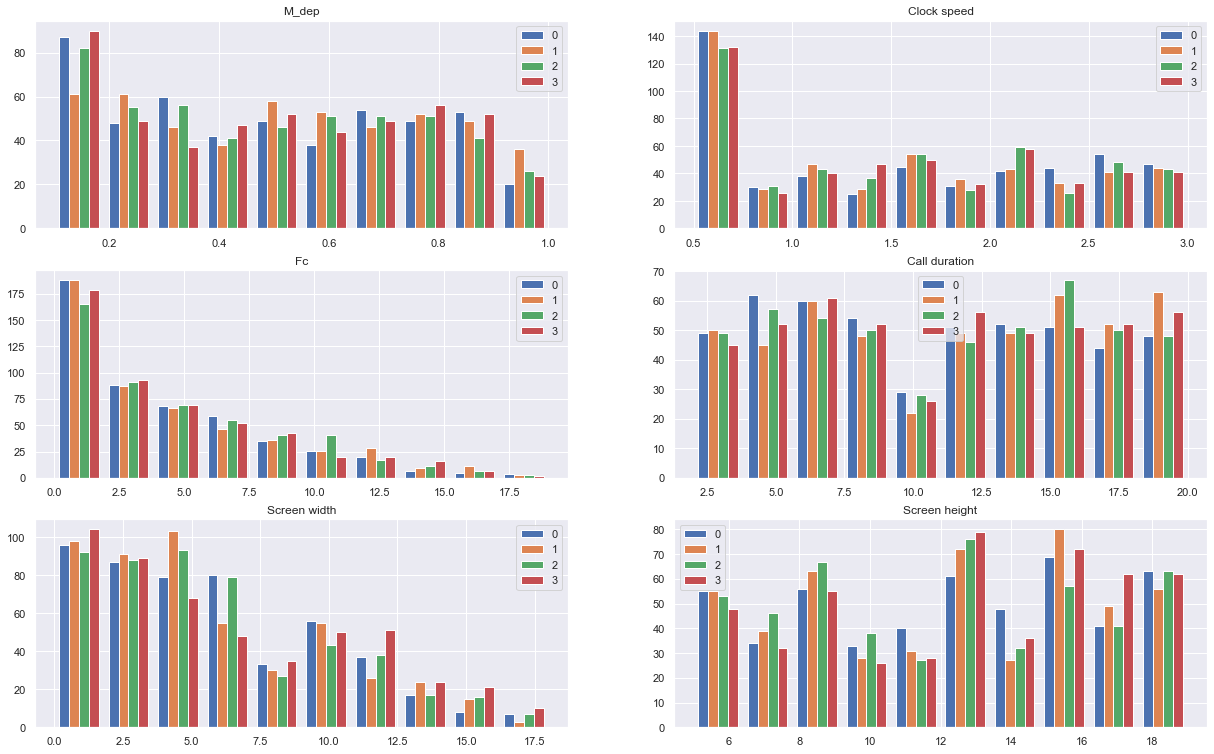

In [9]:
plt.figure(figsize=(21,13))
plt.subplot(3,2,1)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["m_dep"],
    data_app_train[data_app_train["price_range"]==1]["m_dep"],
    data_app_train[data_app_train["price_range"]==2]["m_dep"],
    data_app_train[data_app_train["price_range"]==3]["m_dep"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("M_dep")
plt.subplot(3,2,2)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["clock_speed"],
    data_app_train[data_app_train["price_range"]==1]["clock_speed"],
    data_app_train[data_app_train["price_range"]==2]["clock_speed"],
    data_app_train[data_app_train["price_range"]==3]["clock_speed"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Clock speed")
plt.subplot(3,2,3)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["fc"],
    data_app_train[data_app_train["price_range"]==1]["fc"],
    data_app_train[data_app_train["price_range"]==2]["fc"],
    data_app_train[data_app_train["price_range"]==3]["fc"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Fc")
plt.subplot(3,2,4)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["talk_time"],
    data_app_train[data_app_train["price_range"]==1]["talk_time"],
    data_app_train[data_app_train["price_range"]==2]["talk_time"],
    data_app_train[data_app_train["price_range"]==3]["talk_time"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Call duration")
plt.subplot(3,2,5)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_w"],
    data_app_train[data_app_train["price_range"]==1]["sc_w"],
    data_app_train[data_app_train["price_range"]==2]["sc_w"],
    data_app_train[data_app_train["price_range"]==3]["sc_w"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Screen width")
plt.subplot(3,2,6)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_h"],
    data_app_train[data_app_train["price_range"]==1]["sc_h"],
    data_app_train[data_app_train["price_range"]==2]["sc_h"],
    data_app_train[data_app_train["price_range"]==3]["sc_h"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Screen height")

We now proceed to the preprocessing of the training data for the use of classification models

In [10]:
etiq = data_app_train["price_range"]
data_app_train.drop(["price_range"], axis=1 ,inplace= True)
data_app_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


#### Classification 
We start by subdividing our dataset in two for training and testing afterwards

In [12]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(data_app_train, etiq, test_size=0.3,random_state=23)

##### 1. KNN
We start with a KNN for the classification of the different mobile devices, we use GridSearch allowing the test of all the combinations of parameters to have the best possible result

In [15]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)

knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)
knn.score(fv_train,etiq_train)

0.9364285714285714

The evaluation of the model was conclusive, we can now evaluate the performances on the test set

In [21]:
yknn=knn.predict(fv_test)
print("KNN accuracy rate in testing : ",metrics.accuracy_score(etiq_test, yknn))

KNN accuracy rate in testing :  0.9416666666666667


We then find a very good result with 94.17% accuracy on the test set, we now observe the confusion matrix that we have

Text(0.5, 1.0, 'Confusion matrix')

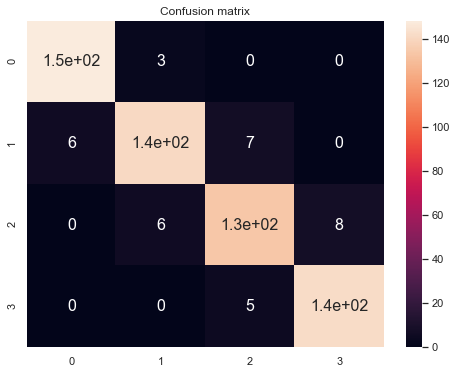

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 16})
plt.title("Confusion matrix")

##### 2. Random Forrest

In [18]:
forrest = RandomForestClassifier(n_estimators = 250, max_features = 'sqrt', criterion = 'entropy').fit(fv_train,etiq_train)
forrest.score(fv_train,etiq_train)

1.0

Perfectly predictable result, since it is based on decision trees built from the training elements

In [22]:
yforrest = forrest.predict(fv_test)
print("Accuracy rate in testing : ",metrics.accuracy_score(etiq_test, yforrest))

Accuracy rate in testing :  0.8916666666666667


On a des résultats très satisfaisant aussi, on affiche la matrice de confusion pour cet algorithme aussi

Text(0.5, 1.0, 'Confusion matrix with the Random Forrest algorithm')

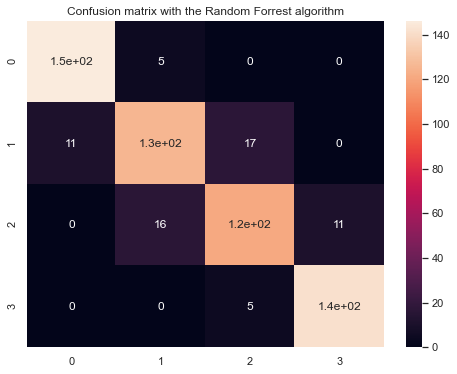

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True)
plt.title("Confusion matrix with the Random Forrest algorithm")

##### 3. Decision Tree
We see if a single tree can suffice for the efficient classification of this dataset

In [26]:
dTree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy').fit(fv_train,etiq_train)
dTree.score(fv_train,etiq_train)

1.0

In [29]:
ydTree = dTree.predict(fv_test)
print("Accuracy rate in testing : ",metrics.accuracy_score(etiq_test, ydTree))

Accuracy rate in testing :  0.8533333333333334


We can see that the Random Forrest improves the model slightly, but clearly, with only one decision tree we already have very good results with an 85.33% accuracy. We display the decision tree to reach this decision

Text(0.5, 1.0, 'Decision tree for phone classification')

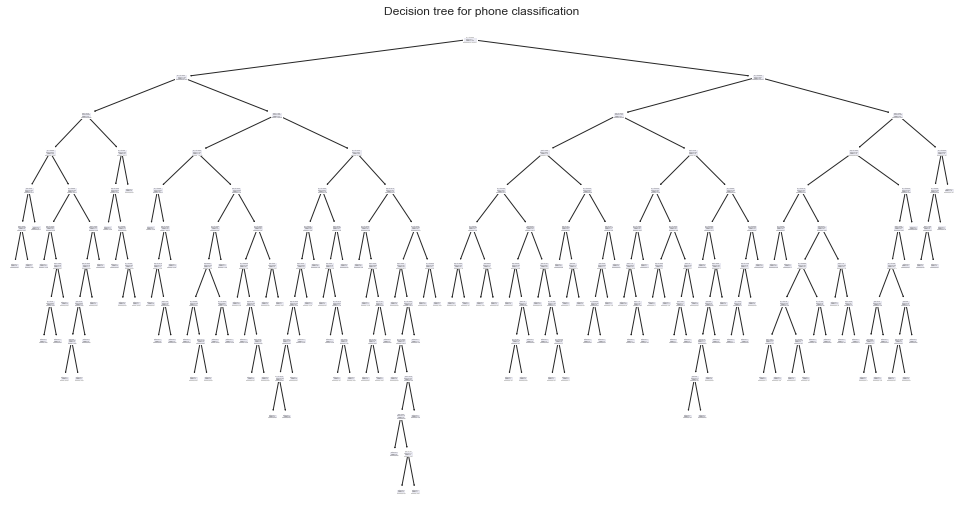

In [30]:
plt.figure(figsize=(17,9))
_= tree.plot_tree(dTree)
plt.title("Decision tree for phone classification")

##### 4. SVM

In [34]:
# Normalisé
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma = 'scale')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)

svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)

svm.score(fv_train,etiq_train)

0.9457142857142857

In [36]:
ysvm=svm.predict(fv_test)

print("Accuracy rate in testing : ",metrics.accuracy_score(etiq_test, ysvm))

Accuracy rate in testing :  0.96


Text(0.5, 1.0, 'Confusion matrix')

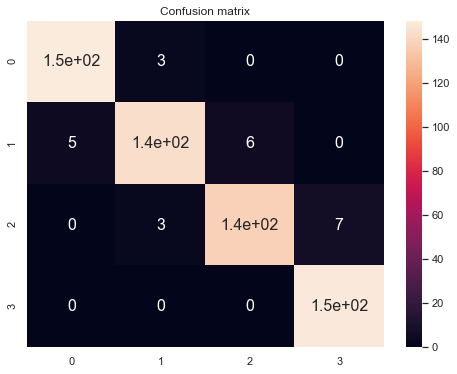

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 16})
plt.title("Confusion matrix")